In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.stats import sem
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Pipeline_im
%matplotlib inline
%config Completer.use_jedi = False


#import required sklearn for random forest classifier

import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix,roc_auc_score, f1_score
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RepeatedStratifiedKFold, RepeatedKFold, cross_validate
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold, SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [2]:
#Load the filtered cis eQTL and trans eQTL file

cis_eQTL_file = '/Users/jake/OneDrive - University of Glasgow/Project/COAD/eQTL/eQTL_95/COAD_FPKM_cis_eQTL_95.csv'
#trans_eQTL_file = '/Users/jake/OneDrive - University of Glasgow/Project/COAD/eQTL/eQTL_95/COAD_FPKM_trans_eQTL_95.csv'

cis_eQTL = pd.read_csv(cis_eQTL_file,header=[0,1],sep='\t',index_col=[0])
#trans_eQTL = pd.read_csv(trans_eQTL_file,header=[0,1],sep='\t',index_col=[0])

In [3]:
cis_eQTL

Gene_symbol,FABP2,ZNF117,XKR9,NUDT13,C2orf74,METTL18,WFDC3,CPNE1,N6AMT1,ULK4,...,DHFR,SLC13A4,ZNF239,RGS6,PCCB,ZNF585A,ZNF79,STMP1,RAB33B,Cancer
Gene_ensembl_id,ENSG00000145384,ENSG00000152926,ENSG00000221947,ENSG00000166321,ENSG00000237651,ENSG00000171806,ENSG00000124116,ENSG00000214078,ENSG00000156239,ENSG00000168038,...,ENSG00000228716,ENSG00000164707,ENSG00000196793,ENSG00000182732,ENSG00000114054,ENSG00000196967,ENSG00000196152,ENSG00000243317,ENSG00000172007,Cancer
Sample_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AA-3867-01A-01R-1022-07,3.037137,0.196912,0.134775,0.772429,0.000000,2.234588,1.247353,107.213731,2.325869,0.495977,...,1.945705,0.124761,1.824938,0.029445,5.974278,0.313096,1.463202,11.145080,2.355141,1
TCGA-CA-6719-01A-11R-1839-07,0.099824,1.756354,0.023035,0.695770,0.341397,4.631485,1.458658,80.408275,1.687151,0.758817,...,2.045258,0.067337,4.956423,0.145942,8.007415,0.733702,2.608254,11.654345,1.838190,1
TCGA-NH-A50V-01A-11R-A28H-07,0.048827,3.480090,1.626679,1.055877,0.199660,3.846554,1.718902,61.832780,3.672512,1.192345,...,2.881462,0.150959,4.854547,0.243694,7.036026,0.845391,1.699452,8.839348,2.831534,1
TCGA-AA-A01C-01A-01R-A00A-07,2.460243,0.846169,0.050361,1.248144,0.194714,1.931712,2.207834,115.282003,1.212708,0.911712,...,2.854681,0.049073,2.469037,0.044010,5.248116,0.356468,2.306620,14.420458,0.586697,1
TCGA-AA-A02F-01A-01R-A089-07,0.302252,1.668233,0.011988,0.482781,0.000000,6.110972,1.265169,67.596046,1.337464,0.910752,...,4.278732,0.052564,5.149422,0.010476,4.530721,0.722315,1.504792,11.204312,1.508238,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-A6-2682-11A-01R-A32Z-07,15.418344,0.596458,0.522916,1.342880,0.449282,2.667528,0.230884,20.136296,2.036059,0.462847,...,3.965134,0.071515,0.721056,0.114243,8.197457,0.459543,2.388808,10.089674,1.481993,0
TCGA-AA-3522-11A-01R-A32Z-07,14.217190,0.575132,0.135610,1.342037,0.194190,4.381274,0.189608,18.652374,2.110484,0.395752,...,4.103690,0.126635,0.703542,0.149782,9.116541,0.600264,2.000086,9.840412,1.878232,0


In [4]:
#### Just working on cis_eQTLs for practice

In [5]:
#Check cis_eQTL for and missing data

cis_eQTL.isnull().sum().unique()

array([0])

In [6]:
#Ratio in percentage ... can simply do sum of Cancer (since tumour =1, normal = 0) divided by the total num of samples

print('Class Ratio Tumour Percentage =',round(sum(cis_eQTL['Cancer','Cancer']) / len(cis_eQTL['Cancer','Cancer'])*100,2),'%')

#And tumour weight / ratio 

tumour_ratio = sum(cis_eQTL['Cancer','Cancer']==1) / sum(cis_eQTL['Cancer','Cancer']==0)
tumour_ratio

Class Ratio Tumour Percentage = 92.1 %


11.658536585365853

In [7]:
#Split data into features (X) and target (y) ... no need to to train_test_split since gridsearch and cv accounts for split

X = cis_eQTL.drop('Cancer',axis=1,level=0)
y= cis_eQTL['Cancer','Cancer']

In [8]:
X.head()

Gene_symbol,FABP2,ZNF117,XKR9,NUDT13,C2orf74,METTL18,WFDC3,CPNE1,N6AMT1,ULK4,...,ZNF786,DHFR,SLC13A4,ZNF239,RGS6,PCCB,ZNF585A,ZNF79,STMP1,RAB33B
Gene_ensembl_id,ENSG00000145384,ENSG00000152926,ENSG00000221947,ENSG00000166321,ENSG00000237651,ENSG00000171806,ENSG00000124116,ENSG00000214078,ENSG00000156239,ENSG00000168038,...,ENSG00000197362,ENSG00000228716,ENSG00000164707,ENSG00000196793,ENSG00000182732,ENSG00000114054,ENSG00000196967,ENSG00000196152,ENSG00000243317,ENSG00000172007
Sample_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AA-3867-01A-01R-1022-07,3.037137,0.196912,0.134775,0.772429,0.000000,2.234588,1.247353,107.213731,2.325869,0.495977,...,2.590448,1.945705,0.124761,1.824938,0.029445,5.974278,0.313096,1.463202,11.145080,2.355141
TCGA-CA-6719-01A-11R-1839-07,0.099824,1.756354,0.023035,0.695770,0.341397,4.631485,1.458658,80.408275,1.687151,0.758817,...,3.959915,2.045258,0.067337,4.956423,0.145942,8.007415,0.733702,2.608254,11.654345,1.838190
TCGA-NH-A50V-01A-11R-A28H-07,0.048827,3.480090,1.626679,1.055877,0.199660,3.846554,1.718902,61.832780,3.672512,1.192345,...,2.126919,2.881462,0.150959,4.854547,0.243694,7.036026,0.845391,1.699452,8.839348,2.831534
TCGA-AA-A01C-01A-01R-A00A-07,2.460243,0.846169,0.050361,1.248144,0.194714,1.931712,2.207834,115.282003,1.212708,0.911712,...,3.787718,2.854681,0.049073,2.469037,0.044010,5.248116,0.356468,2.306620,14.420458,0.586697
TCGA-AA-A02F-01A-01R-A089-07,0.302252,1.668233,0.011988,0.482781,0.000000,6.110972,1.265169,67.596046,1.337464,0.910752,...,3.463259,4.278732,0.052564,5.149422,0.010476,4.530721,0.722315,1.504792,11.204312,1.508238


In [9]:
y

Sample_ID
TCGA-AA-3867-01A-01R-1022-07    1
TCGA-CA-6719-01A-11R-1839-07    1
TCGA-NH-A50V-01A-11R-A28H-07    1
TCGA-AA-A01C-01A-01R-A00A-07    1
TCGA-AA-A02F-01A-01R-A089-07    1
                               ..
TCGA-A6-2682-11A-01R-A32Z-07    0
TCGA-AA-3522-11A-01R-A32Z-07    0
TCGA-AA-3662-11A-01R-1723-07    0
TCGA-AA-3520-11A-01R-A32Z-07    0
TCGA-A6-2685-11A-01R-A32Z-07    0
Name: (Cancer, Cancer), Length: 519, dtype: int64

In [10]:
#First do simple random forest with gridsearch to determine optimal parameters

#Quick GridsearchCV

#Weighted Random forest
classifier = RandomForestClassifier(random_state=1,class_weight={0:1,1:tumour_ratio})
                                   
#Pipeline containing RF classifier and LinearSVC with deafault settings for feature engineering
#Also added scaler as error related to iterations / convergance appears, which can be due to 'poor scaling'
RF_pipeline_LSVC = Pipeline(steps=[('scale', StandardScaler()),
                                   ('feature_selection', SelectFromModel(LinearSVC())),
                                   ('classifier',classifier)])


#Dictinoary of potential parameters
param_grid = { 
    'classifier__n_estimators': [100,300,500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__criterion' :['gini', 'entropy']}

#Use repeated stratified k fold to maintian ratio between tumor and normal and do multliple splits of data
r_stratkfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

grid_search = GridSearchCV(RF_pipeline_LSVC, param_grid=param_grid, scoring="roc_auc",cv=r_stratkfold)

#Fit on full data
grid_search.fit(X, y)

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_features': 'log2', 'classifier__n_estimators': 300}


In [11]:
#Create dictinoary containing the best parameters
best_params = {}
for k,v in grid_search.best_params_.items():
       best_params[k] = v
best_params

{'classifier__criterion': 'entropy',
 'classifier__max_features': 'log2',
 'classifier__n_estimators': 300}

In [12]:
#Now can create a model utilising the identified best parameters
#Define model function that will return cross val score to evalaute model overall

# evaluate a model with a given number of repeats
def rf_model_cv_scores(X, y, repeats, splits=3):
    '''RF model function. Takes in X and y data, with repeats = n_repeats for repeated k fold and splits set at 3 for default'''

    #First perform RepeatedStratifiedKFold
    r_stratkfold = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats, random_state=1)
    
    # Create pipeline with RF model using best_params_ from gridsearch
    
    classifier = RandomForestClassifier(criterion=best_params['classifier__criterion'],
                                   max_features= best_params['classifier__max_features'],
                                   n_estimators = best_params['classifier__n_estimators'],
                                   class_weight={0:1,1:tumour_ratio},
                                   random_state=1)
    
    #Weigthed LinearSVC for feature selection
    feature_selection = SelectFromModel(LinearSVC(class_weight={0:1,1:tumour_ratio},random_state=1))
    
    RF_pipeline_LSVC = Pipeline(steps=[('scale', StandardScaler()),
                                   ('feature_selection', feature_selection),
                                   ('classifier',classifier)])
    
    
    # evaluate the cross_val_score - return ROCAUC score
    scores = cross_val_score(RF_pipeline_LSVC, X, y, scoring='roc_auc', cv=r_stratkfold)
    
    return scores


In [13]:
#Use for loop to test the model across different repeats

#Range for different num of repeats
repeats = range(1,11)

#Create list to store results
ROCAUC_results = list()

for i in repeats:
    
    # evaluate model using a given number of repeats
    results = rf_model_cv_scores(X, y, i)
    
    # print mean result and standard error of mean for each repeat
    print (f'Repeat {i}: Mean ROCAUC Score = {np.mean(results):.3f} SEM = {sem(results):.3f}')
    
    # Append to results
    ROCAUC_results.append(results)

Repeat 1: Mean ROCAUC Score = 1.000 SEM = 0.000
Repeat 2: Mean ROCAUC Score = 0.999 SEM = 0.001
Repeat 3: Mean ROCAUC Score = 0.999 SEM = 0.000
Repeat 4: Mean ROCAUC Score = 0.999 SEM = 0.000
Repeat 5: Mean ROCAUC Score = 0.999 SEM = 0.000
Repeat 6: Mean ROCAUC Score = 0.999 SEM = 0.000
Repeat 7: Mean ROCAUC Score = 0.999 SEM = 0.000
Repeat 8: Mean ROCAUC Score = 0.999 SEM = 0.000
Repeat 9: Mean ROCAUC Score = 0.999 SEM = 0.000
Repeat 10: Mean ROCAUC Score = 0.999 SEM = 0.000


Text(0.5, 1.0, 'AUCROC Score Weighted')

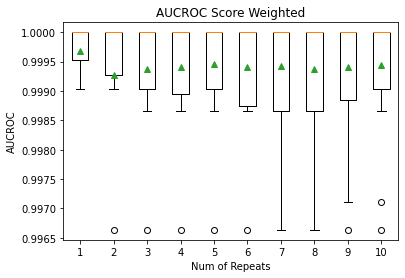

In [14]:
#Create boxplot showing the ROCAUC score distibution across the different number of repeats

plt.boxplot(ROCAUC_results, labels=[str(i) for i in repeats], showmeans=True)
plt.ylabel('AUCROC')
plt.xlabel('Num of Repeats')
plt.title('AUCROC Score Weighted')

In [15]:
#Attempt using SMOTE for data augmentation of the minority normal class
#Therefore drop any attributes such as class_weight that account for weight
#imblearn has its own pipline to use with SMOTE

def rf_model_SMOTE(X, y, repeats, splits=3):
    '''RF model function. Takes in X and y data, with repeats = n_repeats for repeated k fold. SMOTE added to pipeline for imblance.'''

    # only the standard RepeatedKFold required
    r_stratkfold = RepeatedKFold(n_splits= splits, n_repeats=repeats, random_state=1)
    
    # Create pipeline with RF model using best_params_ from gridsearch .. drop class weight
    classifier = RandomForestClassifier(criterion=best_params['classifier__criterion'],
                                   max_features= best_params['classifier__max_features'],
                                   n_estimators = best_params['classifier__n_estimators'],
                                   random_state=1)
    
    #Add SMOTE to pipeline after scale before feature selection??
    #Use Pipeline_im
    RF_pipeline_LSVC_SMOTE = Pipeline_im(steps=[('scale', StandardScaler()),
                                       ('SMOTE', SMOTE()),
                                       ('feature_selection', SelectFromModel(LinearSVC())),
                                       ('classifier',classifier)])
    
    
    # evaluate the cross_val_score - use standard f1
    scores = cross_val_score(RF_pipeline_LSVC_SMOTE, X, y, scoring='roc_auc', cv=r_stratkfold)
    
    return scores


In [16]:
#Use for loop to test the model across different repeats

#Range for different num of repeats
repeats = range(1,11)

#Create list to store results
ROCAUC_results_SMOTE = list()

for i in repeats:
    
    # evaluate model using a given number of repeats
    results = rf_model_SMOTE(X, y, i)
    
    # print mean result and standard error of mean for each repeat
    print (f'Repeat {i}: Mean ROCAUC Score = {np.mean(results):.3f} SEM = {sem(results):.3f}')
    
    # Append to results
    ROCAUC_results_SMOTE.append(results)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Repeat 1: Mean ROCAUC Score = 1.000 SEM = 0.000


/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Repeat 2: Mean ROCAUC Score = 0.999 SEM = 0.000


/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Repeat 3: Mean ROCAUC Score = 0.999 SEM = 0.000


/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increa

Repeat 4: Mean ROCAUC Score = 1.000 SEM = 0.000


/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increa

Repeat 5: Mean ROCAUC Score = 1.000 SEM = 0.000


/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increa

Repeat 6: Mean ROCAUC Score = 1.000 SEM = 0.000


/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increa

Repeat 7: Mean ROCAUC Score = 1.000 SEM = 0.000


/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increa

Repeat 8: Mean ROCAUC Score = 1.000 SEM = 0.000


/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increa

Repeat 9: Mean ROCAUC Score = 1.000 SEM = 0.000


/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increa

Repeat 10: Mean ROCAUC Score = 1.000 SEM = 0.000


Text(0.5, 1.0, 'AUCROC Score SMOTE')

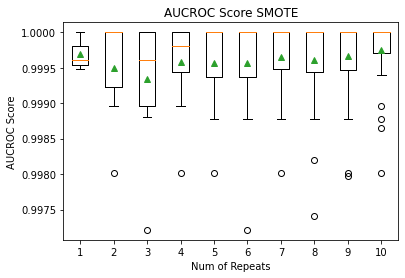

In [17]:
plt.boxplot(ROCAUC_results_SMOTE, labels=[str(i) for i in repeats], showmeans=True)
plt.ylabel('AUCROC Score')
plt.xlabel('Num of Repeats')
plt.title('AUCROC Score SMOTE')

In [18]:
#Attempt with cross validate instead of cross_val_score to return multiple scoring values

#Define model function that will return cross_validate to evalaute model overall

# evaluate a model with a given number of repeats
def rf_model_cv(X, y, repeats, splits = 3):
    '''RF model function. Takes in X and y data, with repeats = n_repeats for repeated k fold'''

    #First perform RepeatedStratifiedKFold
    r_stratkfold = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats, random_state=1)
    
    # Create pipeline with RF model using best_params_ from gridsearch
    
    classifier = RandomForestClassifier(criterion=best_params['classifier__criterion'],
                                   max_features= best_params['classifier__max_features'],
                                   n_estimators = best_params['classifier__n_estimators'],
                                   class_weight={0:1,1:tumour_ratio},
                                   random_state=1)
    
    feature_selection = SelectFromModel(LinearSVC(class_weight={0:1,1:tumour_ratio},random_state=1))
    
    
    RF_pipeline_LSVC = Pipeline(steps=[('scale', StandardScaler()),
                                   ('feature_selection', feature_selection),
                                   ('classifier',classifier)])
    
    
    # evaluate the cross_validate
    scores_cv = cross_validate(RF_pipeline_LSVC, X, y, cv=r_stratkfold,
                            scoring=('f1_weighted','roc_auc','balanced_accuracy','precision_weighted','recall_weighted'))
    
    
    print (f"Mean F1 weighted = {scores_cv['test_f1_weighted'].mean()} ")
    print (f"Mean ROCAUC score = {scores_cv['test_roc_auc'].mean()}")
    print (f"Mean balanced accuracy score = {scores_cv['test_balanced_accuracy'].mean()}")
    print (f"Mean weighted precision = {scores_cv['test_precision_weighted'].mean()}")
    print (f"Mean weighted recall = {scores_cv['test_recall_weighted'].mean()}")
    

    

In [19]:
#Call cross_validate Rf model with 10 repeats

rf_model_cv(X,y,repeats=10,splits=5)

Mean F1 weighted = 0.9899971310038783 
Mean ROCAUC score = 0.9995357273391814
Mean balanced accuracy score = 0.9504828216374271
Mean weighted precision = 0.9905444338090104
Mean weighted recall = 0.9903678117998505


In [20]:
###Could put the for loop into function and just call model

# def model_f1_results(model):
    
#     '''For loop to gain model f1 results from different num of repeats (1 - 10)'''
    
#     #Range for different num of repeats
#     repeats = range(1,11)

#     #Create list to store results
#     f1_results = list()
    
#     for i in repeats:
    
#         # evaluate model using a given number of repeats
#         results = model(X, y, i)

#         # print mean result and standard error of mean for each repeat
#         print (f'Repeat {i}: Mean F1 = {np.mean(results):.3f} SEM = {sem(results):.3f}')

#         # Append to results
#         f1_results.append(results)